### Analysis and Visualization of Budget 2024 Highlights

In [91]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud

In [2]:
Category= ["Employment Benefit Youth", "Employment Scheme B Jobs", "Employment Scheme A Youth",
            "Free Electricity Households", "Free Electricity Units", "Infrastructure Provision", 
            "State Loans", "PMGSY Rural Habitations", "Electricity Registrations", "Electricity Applications",
            "Receipts Income Tax", "Receipts Borrowing and Other Liabilities", "Receipts Union Excise Duties",
            "Receipts GST and Other Taxes", "Receipts Non-Tax Receipts", "Receipts Non-Debt Capital Receipts",
            "Receipts Corporation Tax", "Expenditure Other Expenditure", "Expenditure Pensions", 
            "Expenditure Interest Payments", "Expenditure Centrally Sponsored Scheme", "Expenditure Finance Commission and Other Transfers", 
            "Expenditure Central Sector Scheme", "Expenditure States' Share of Taxes and Duties", "Expenditure Subsidies", "Expenditure Defence", 
            "Major Items Expenditure 1", "Major Items Expenditure 2", "Major Items Expenditure 3",
            "Major Items Expenditure 4", "Major Items Expenditure 5", "Major Items Expenditure 6", 
            "Major Items Expenditure 7", "Major Items Expenditure 8", "Major Items Expenditure 9", 
            "Major Items Expenditure 10" ]
Value = [210, 50, 30, 1, 300, 1111111, 150000, 25000, 1.28, 14, 19, 27, 5, 18, 9, 4, 17, 9, 4, 19,
         8, 9, 16, 21, 6, 8, 454773, 265808, 151851, 150983, 125638, 116342, 89287, 68769, 56501,
         47559]
Unit = ["lakh youth", "lakh jobs", "lakh youth", "crore households", "units per month", "crore", "crore",
        "rural habitations", "crore", "lakh applications", "%", "%", "%", "%", "%", "%", "%", "%", 
        "%", "%", "%", "%", "%", "%", "%", "%", "₹ crore", "₹ crore", "₹ crore", "₹ crore", "₹ crore", 
        "₹ crore", "₹ crore", "₹ crore", "₹ crore", "₹ crore"]

In [12]:
data = {"Category": Category, "Value":Value, "Unit": Unit}
budget_df = pd.DataFrame(data)
budget_df.head()

,Category,Value,Unit
0,Employment Benefit Youth,210.0,lakh youth
1,Employment Scheme B Jobs,50.0,lakh jobs
2,Employment Scheme A Youth,30.0,lakh youth
3,Free Electricity Households,1.0,crore households
4,Free Electricity Units,300.0,units per month


In [17]:
budget_df.shape

(36, 3)

In [18]:
expenditures = budget_df[budget_df["Category"].str.contains("Expenditure|Major Items Expenditure")]
expenditures

,Category,Value,Unit
17,Expenditure Other Expenditure,9.0,%
18,Expenditure Pensions,4.0,%
19,Expenditure Interest Payments,19.0,%
20,Expenditure Centrally Sponsored Scheme,8.0,%
21,Expenditure Finance Commission and Other Trans...,9.0,%
22,Expenditure Central Sector Scheme,16.0,%
23,Expenditure States' Share of Taxes and Duties,21.0,%
24,Expenditure Subsidies,6.0,%
25,Expenditure Defence,8.0,%
26,Major Items Expenditure 1,454773.0,₹ crore


In [20]:
receipts = budget_df[budget_df["Category"].str.contains("Receipts")]
receipts

,Category,Value,Unit
10,Receipts Income Tax,19.0,%
11,Receipts Borrowing and Other Liabilities,27.0,%
12,Receipts Union Excise Duties,5.0,%
13,Receipts GST and Other Taxes,18.0,%
14,Receipts Non-Tax Receipts,9.0,%
15,Receipts Non-Debt Capital Receipts,4.0,%
16,Receipts Corporation Tax,17.0,%


In [25]:
total_expend_value = expenditures["Value"].sum()
total_receipts_value = receipts["Value"].sum()
print(f"Total Expenditure value is {total_expend_value}")
print(f"Total Receipts values are: {total_receipts_value}")

Total Expenditure value is 1527611.0
Total Receipts values are: 99.0


In [40]:
fig_expenditures = px.bar(expenditures, x = "Value", y = "Category", orientation='h', title="Expenditures",
       labels={"Value": "Value (Cr in Rupees)", "Category": "Category"})
fig_expenditures.show()

In [41]:
fig_receipts = px.bar(receipts, x = "Value", y = "Category", orientation='h', title="Receipts",
       labels={"Value":"Value (Cr in Rupee)", "Category":"Category"})
fig_receipts.show()

In [66]:

max_expenditure = expenditures.loc[expenditures["Value"].idxmax()]
print(f"Category with Maximum Expenditure: {max_expenditure['Category']} ({max_expenditure['Value']} {max_expenditure['Unit']})")
max_receipt = receipts.loc[receipts["Value"].idxmax()]
print(f"Category with Maximum Receipts: {max_receipt['Category']} ({max_receipt['Value']} {max_receipt['Unit']})")

Category with Maximum Expenditure: Major Items Expenditure 1 (454773.0 ₹ crore)
Category with Maximum Receipts: Receipts Borrowing and Other Liabilities (27.0 %)


In [73]:
fig_expend_piechart = px.pie(expenditures, values="Value", names="Category", title="Expenditure_Distribution")
fig_expend_piechart.show()

In [75]:
fig_receipt_piechart = px.pie(receipts, values="Value", names="Category", title="Receipts_Distribution")
fig_receipt_piechart.show()

In [80]:
fig_scatter = px.scatter(budget_df, x = "Value", y = "Category", color="Category", title="Scatter plot of Categories",
           labels={"Value": "Value", "Category":"Category"})
fig_scatter.show()

In [83]:
fig_sunbrust = px.sunburst(budget_df, path = ["Category"], values="Value", title="SunbrustChart of Categories")
fig_sunbrust.show()

In [119]:
Section= ["01", "01", "01", "01", "02", "02", "02", "02", "03", "03", "03", "03", "04", "04", "05", "05", "05", "06", "07", "07", "08", "08", "10"]
Subsection = ["Transforming Agriculture Research", "National Cooperation Policy", 
              "Atmanirbharta For oil seeds", "Vegetable production & supply chain", 
              "PM’s Package (3 schemes for Employment Linked Incentive)", 
              "Scheme B Job Creation in Manufacturing", "Scheme A First Timers", 
              "Scheme C Support to Employers", "Credit Guarantee Scheme for MSMEs", 
              "Enhanced scope for mandatory onboarding in TReDS", "MSME Units for Food Irradiation, Quality & Safety Testing", 
              "Mudra Loans", "Urban Development", "PM Awas Yojana Urban 2.0", "Initiatives with private sector in Nuclear Energy", 
              "Energy Audit", "Pumped Storage Policy", "1 crore Households obtain free electricity", 
              "Provision of ₹11,11,111 crore for infrastructure", "₹1.5 lakh crore to states as long-term interest free loans", 
              "Development of Vishnupad Temple Corridor", "Unique Land Parcel Identification Number", 
              "Sector Specific Customs Duty Proposals" ]
Details = ["Comprehensive review of the agriculture research setup to bring focus on raising productivity and developing climate resilient varieties.", 
           "For systematic, orderly and all-round development of the cooperative sector.", 
           "For oil seeds such as mustard, groundnut, sesame, soyabean and sunflower.", 
           "Promotion of FPOs, cooperatives & start-ups for vegetable supply chains for collection, storage, and marketing.", 
           "One-month wage to new entrants in all formal sectors in 3 instalments up to ₹15,000. Expected to benefit 210 lakh youth.", 
           "Government will reimburse EPFO contributions of employers up to ₹3000 per month for 2 years for all new hires. Expected to generate 50 lakh jobs.", 
           "Linked to first time employees. Incentive to both employee & employer for EPFO contributions in the specified scales for the first 4 years. Expected to benefit 30 lakh youth.", "", 
           "Credit Guarantee Scheme for MSMEs in the Manufacturing Sector.", "Enhanced scope for mandatory onboarding in TReDS.",
           "New assessment model for MSME credit. Credit Support to MSMEs during Stress Period.", 
           "The limit enhanced to ₹ 20 lakh from the current ₹ 10 lakh under the ‘Tarun’ category.", 
           "PM Awas Yojana Urban 2.0.", "Needs of 1 crore urban poor and middle-class families will be addressed with an investment of ₹10 lakh crore. Enabling policies and regulations for efficient and transparent rental housing markets with enhanced availability will also be put in place.", 
           "Setting up Bharat Small Reactors. R&D of Bharat Small Modular Reactor and newer technologies for nuclear energy.", "Financial support for shifting of micro and small industries to cleaner forms of energy. Facilitate investment grade energy audit in 60 clusters, next phase expands to 100 clusters.", 
           "For electricity storage and facilitation of smooth integration of the growing share of renewable energy. AUSC Thermal Power Plants: A joint venture between NTPC and BHEL will set up a full scale 800 MW commercial plant.", 
           "Up to 300 Units every month. 1.28 crore Registrations and 14 lakh applications so far.", 
           "Provision of ₹11,11,111 crore for infrastructure (3.4% of GDP).", 
           "₹1.5 lakh crore to states as long-term interest free loans to support resource allocation. Phase IV of PMGSY will be launched to provide all-weather connectivity to 25,000 rural habitations.", 
           "Development of Vishnupad Temple Corridor and Mahabodhi Temple Corridor modelled on Kashi Vishwanath Temple Corridor. Comprehensive development initiative for Rajgir. Development of Nalanda as a tourist centre. Assistance to development of Odisha’s scenic beauty, temples, monuments, craftsmanship, wildlife sanctuaries, natural landscapes and pristine beaches.", 
           "Unique Land Parcel Identification Number or Bhu-Aadhaar for all lands. Survey of map sub-divisions as per current ownership. Linkages to the farmers’ registries. Land records in urban areas will be digitized with GIS mapping. Digitization of cadastral maps. Establishment of land registry.", 
           "Sector Specific Customs Duty Proposals." ]

In [120]:
df1 = pd.DataFrame({"Section": Section, "Subsection":Subsection, "Details": Details})
df1.head()

,Section,Subsection,Details
0,01,Transforming Agriculture Research,Comprehensive review of the agriculture resear...
1,01,National Cooperation Policy,"For systematic, orderly and all-round developm..."
2,01,Atmanirbharta For oil seeds,"For oil seeds such as mustard, groundnut, sesa..."
3,01,Vegetable production & supply chain,"Promotion of FPOs, cooperatives & start-ups fo..."
4,02,PM’s Package (3 schemes for Employment Linked ...,One-month wage to new entrants in all formal s...


In [121]:
section_counts = df1["Section"].value_counts().sort_index()
print(f"Number of Sub-Section in each section: \n{section_counts}")

Number of Sub-Section in each section: 
Section
01    4
02    4
03    4
04    2
05    3
06    1
07    2
08    2
10    1
Name: count, dtype: int64


In [122]:
section_counts.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '10'], dtype='object', name='Section')

In [123]:
section_counts.values

array([4, 4, 4, 2, 3, 1, 2, 2, 1], dtype=int64)

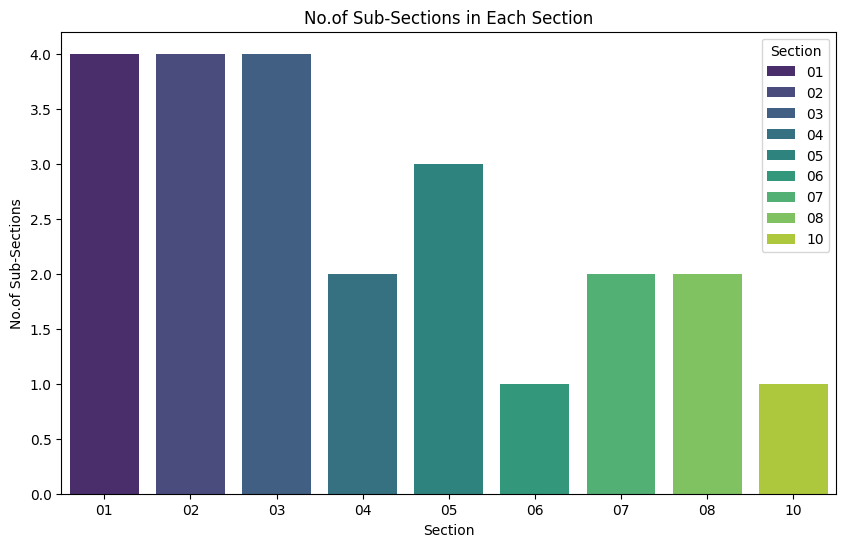

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(x = section_counts.index, y = section_counts.values, palette="viridis", 
            hue = section_counts.index, legend=True)
plt.xlabel("Section")
plt.ylabel("No.of Sub-Sections")
plt.title("No.of Sub-Sections in Each Section")
plt.show()

In [125]:
df1.isnull().sum()

Section       0
Subsection    0
Details       0
dtype: int64

In [127]:
details_txt = " ".join(df1["Details"].dropna())
details_txt

'Comprehensive review of the agriculture research setup to bring focus on raising productivity and developing climate resilient varieties. For systematic, orderly and all-round development of the cooperative sector. For oil seeds such as mustard, groundnut, sesame, soyabean and sunflower. Promotion of FPOs, cooperatives & start-ups for vegetable supply chains for collection, storage, and marketing. One-month wage to new entrants in all formal sectors in 3 instalments up to ₹15,000. Expected to benefit 210 lakh youth. Government will reimburse EPFO contributions of employers up to ₹3000 per month for 2 years for all new hires. Expected to generate 50 lakh jobs. Linked to first time employees. Incentive to both employee & employer for EPFO contributions in the specified scales for the first 4 years. Expected to benefit 30 lakh youth.  Credit Guarantee Scheme for MSMEs in the Manufacturing Sector. Enhanced scope for mandatory onboarding in TReDS. New assessment model for MSME credit. Cred

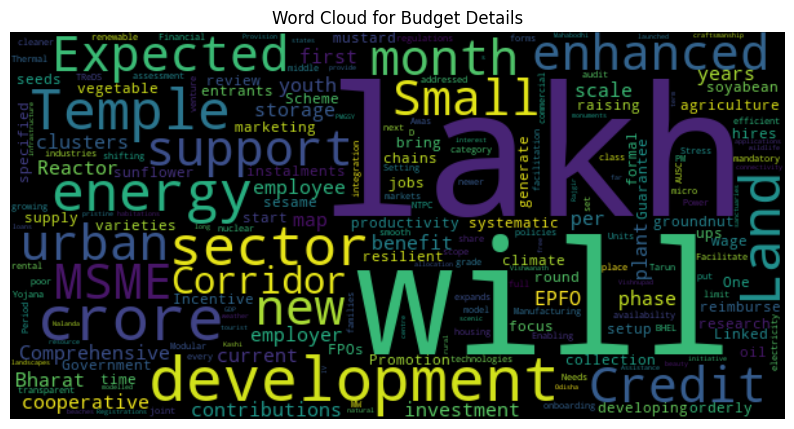

In [138]:
wc = wordcloud.WordCloud(height=300, width=600, background_color='black')
wc = wc.generate(details_txt)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Budget Details')
plt.show()

In [139]:
Category = ["PM’s Package (3 schemes for Employment Linked Incentive)", 
            "Government reimbursement for EPFO contributions", "Mudra Loans", 
            "PM Awas Yojana Urban 2.0", "Investment in Urban Development", 
            "Provision for Infrastructure", "Interest-free loans to states", 
            "Vishnupad Temple Corridor Development", "Energy Audit financial support", 
            "AUSC Thermal Power Plants", "Total expenditure on infrastructure", 
            "Total credit support to MSMEs", "Investment in electricity provision for households", 
            "Total investment in Nuclear Energy initiatives"]

Amount_in_Cr = [15000, 3000, 20000, 1000000, 100000, 1111111, 150000, 0, 0, 0, 454773, 20000, 0, 0 ]


In [141]:
df2 = pd.DataFrame({"Category": Category, "Amount_(₹ Crore)": Amount_in_Cr})
df2

,Category,Amount_(₹ Crore)
0,PM’s Package (3 schemes for Employment Linked ...,15000
1,Government reimbursement for EPFO contributions,3000
2,Mudra Loans,20000
3,PM Awas Yojana Urban 2.0,1000000
4,Investment in Urban Development,100000
5,Provision for Infrastructure,1111111
6,Interest-free loans to states,150000
7,Vishnupad Temple Corridor Development,0
8,Energy Audit financial support,0
9,AUSC Thermal Power Plants,0


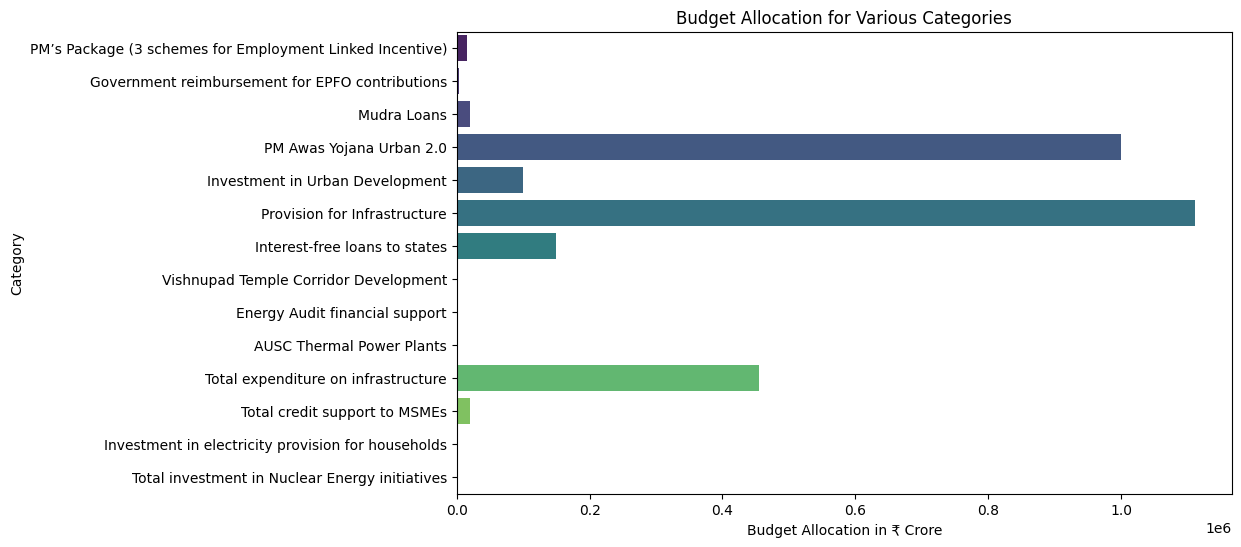

In [146]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Amount_(₹ Crore)", y = "Category", hue = "Category", data = df2, palette="viridis")
plt.xlabel("Budget Allocation in ₹ Crore")
plt.ylabel("Category")
plt.title("Budget Allocation for Various Categories")
plt.show()